In [1]:
import city_class_test
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from itertools import chain

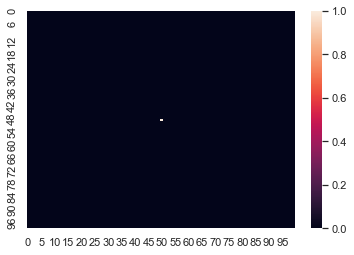

[(0, 2),
 (1, 2),
 (2, 2),
 (0, 3),
 (1, 3),
 (2, 3),
 (1, 4),
 (2, 4),
 (0, 5),
 (1, 5),
 (2, 5),
 (0, 6),
 (1, 6),
 (2, 6)]

In [2]:
%timeit
def plot_grid(city):
    activity_grid = np.array([obj.value for row in city.grid for obj in row]).reshape(city.n,city.n)
    fig = plt.figure()
    sns.heatmap(activity_grid)
    plt.show()
#     fig.savefig("first_model_t={}.jpg".format((i+1)*10))

city = city_class_test.City(n=100)
plot_grid(city)

city.grid[0,4].field_neighbors

In [3]:
def time(city):
    for i in range(10):
        for _ in range(10):
            city.step()
        plot_grid(city)   

# for row in city.grid:
#     for cell in row:
#         print(cell.pos)
#         print(cell.neighborhood)
#         print(cell.field_neighbors)
#         print('----------------')


city.step()

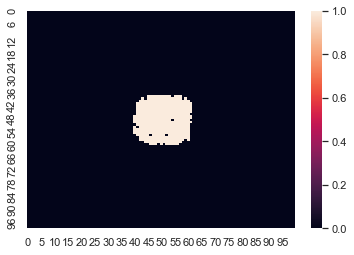

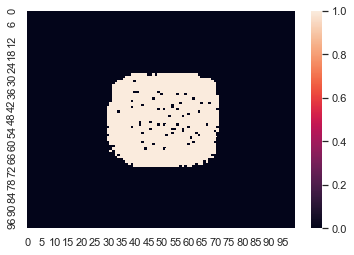

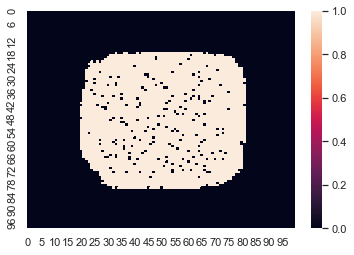

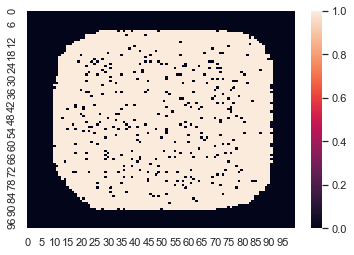

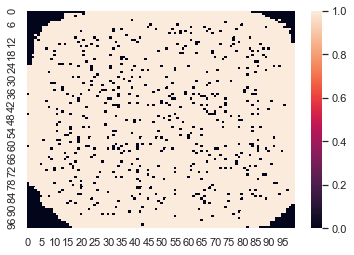

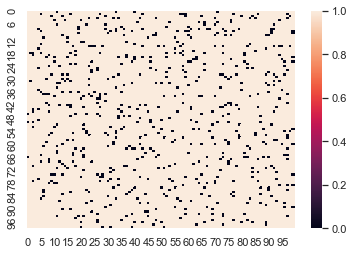

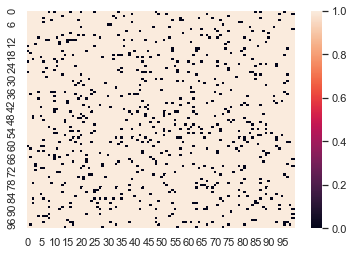

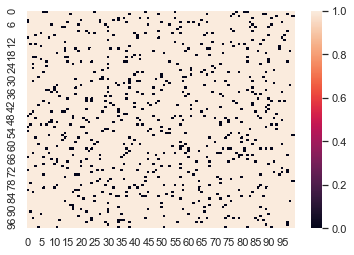

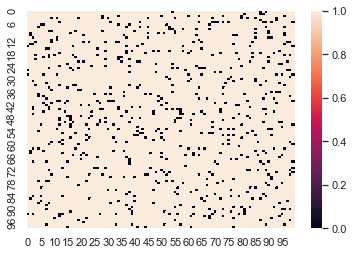

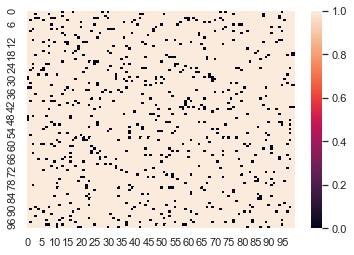

In [4]:
time(city)

In [5]:
city.grid[0,4].field_neighbors

[(0, 2),
 (1, 2),
 (2, 2),
 (0, 3),
 (1, 3),
 (2, 3),
 (1, 4),
 (2, 4),
 (0, 5),
 (1, 5),
 (2, 5),
 (0, 6),
 (1, 6),
 (2, 6)]

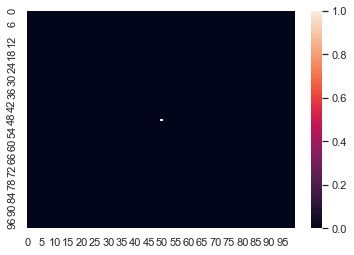

In [26]:
plot_grid(city)